-=-=-=-=-=-=-=- LAYER 1 ATTRIBUTES -=-=-=-=-=-=-=-
Output weights:  27
Total weights:  1728
Activations:  136
PEs per output:  0.10546875
PEs required: 7.0
MAX PE UTILIZATION (%) 2.734375
-=-=-=-=-=-=-=- LAYER 2 ATTRIBUTES -=-=-=-=-=-=-=-
Output weights:  448
Total weights:  28672
Activations:  136
PEs per output:  1.75
PEs required: 112.0
MAX PE UTILIZATION (%) 43.75
-=-=-=-=-=-=-=- LAYER 3 ATTRIBUTES -=-=-=-=-=-=-=-
Output weights:  448
Total weights:  7168
Activations:  40
PEs per output:  1.75
PEs required: 28.0
MAX PE UTILIZATION (%) 10.9375


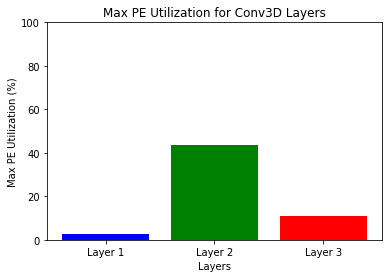

In [1]:
import numpy as np
import matplotlib.pyplot as plt

MAX_PES = 256
BATCH_SIZE = 8

def calculate__output_weights(input_channels, filter_width, filter_height):
    output_weights = input_channels * filter_width * filter_height
    print("Output weights: ", output_weights)
    return output_weights

def calculate_total_weights(input_channels, output_channels, filter_width, filter_height):
    total_weights = input_channels * output_channels * filter_width * filter_height
    print("Total weights: ", total_weights)
    return total_weights

def calculate_max_PE_utilization(batch_size, total_weights, output_weights, output_channels):
    activations = batch_size^2 * output_channels
    print("Activations: ", activations)

    pes_per_output = output_weights / MAX_PES # 256 for the number of given PEs
    print("PEs per output: ", pes_per_output)

    layer_pes = np.ceil(pes_per_output * output_channels)
    print("PEs required:", layer_pes)

    pe_util = (layer_pes / MAX_PES) * 100
    print("MAX PE UTILIZATION (%)", pe_util)

    return pe_util

# LAYER 1 Variables
input_chans = 3
output_chans = 64
f_width = 3
f_height = 3

print("-=-=-=-=-=-=-=- LAYER 1 ATTRIBUTES -=-=-=-=-=-=-=-")

output_weights = calculate__output_weights(input_chans, f_width, f_height)
total_weights = calculate_total_weights(input_chans, output_chans, f_width, f_height)
layer_1 = calculate_max_PE_utilization(BATCH_SIZE, total_weights, output_weights, output_chans)

# LAYER 2 Variables
input_chans = 64
output_chans = 64
f_width = 1
f_height = 7

print("-=-=-=-=-=-=-=- LAYER 2 ATTRIBUTES -=-=-=-=-=-=-=-")

output_weights = calculate__output_weights(input_chans, f_width, f_height)
total_weights = calculate_total_weights(input_chans, output_chans, f_width, f_height)
layer_2 = calculate_max_PE_utilization(BATCH_SIZE, total_weights, output_weights, output_chans)

# LAYER 2 Variables
input_chans = 64
output_chans = 16
f_width = 7
f_height = 1

print("-=-=-=-=-=-=-=- LAYER 3 ATTRIBUTES -=-=-=-=-=-=-=-")

output_weights = calculate__output_weights(input_chans, f_width, f_height)
total_weights = calculate_total_weights(input_chans, output_chans, f_width, f_height)
layer_3 = calculate_max_PE_utilization(BATCH_SIZE, total_weights, output_weights, output_chans)

layers = ['Layer 1', 'Layer 2', 'Layer 3']
results = [layer_1, layer_2, layer_3]
title = "Max PE Utilization for Conv3D Layers"

plt.bar(layers, results, color=['blue', 'green', 'red'])
plt.title(title)
plt.xlabel('Layers')
plt.ylabel('Max PE Utilization (%)')
plt.ylim(0, 100)
plt.show()